F:\Anaconda\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


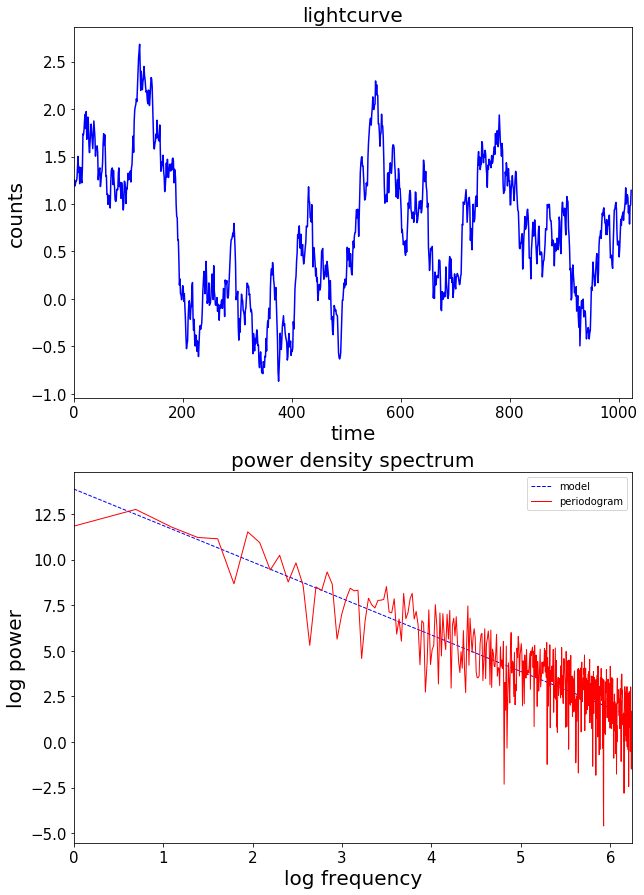

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft


'''
#fft说明
yy=fft(f)           #快速傅里叶变换
yreal = yy.real     # 获取实数部分
yimag = yy.imag     # 获取虚数部分
'''
#光变曲线
beta = 2.0   #用于检验的beta值为 1.0 or 2.0
N = 1024
dt=1
omega = []
POW = []
DFT = []
fr = []
fi = []
f1 = []
f2 = []
counts = []
p = []
f = []
for j in range(1,int(N)+1):
    omega.append(j/(N*dt))
    POW.append((1/omega[-1])**beta)
    DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
    s1=np.random.normal(loc=0.0, scale=1.0, size=None)
    s2=np.random.normal(loc=0.0, scale=1.0, size=None)
    fr.append((DFT[-1].real)*s1)
    fi.append((DFT[-1].imag)*s2)
    f1.append(complex(fr[-1],fi[-1]))


'''   
a=512
for j in range(1,int(N)//2+1):
    a=a-1
    f2.append(complex(fr[a],-fi[a]))


f0=[0]
f.extend(f2)
f.extend(f0)
f.extend(f1)
'''
counts = ifft(f1)
t = np.arange(len(counts))

fig= plt.figure(figsize=(10,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)


ax1.plot(t,counts,'b')
ax1.set_xlabel("time",fontsize=20)
ax1.set_ylabel("counts",fontsize=20)
ax1.set_xlim(0,1024)
ax1.tick_params(labelsize=15)
ax1.set_title("lightcurve",fontsize=20)



#周期图
nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts)
x_new  = [i-mean_x for i in counts]
dft   = fft(x_new)
dft_1 = dft[1:int(nf)+1]
per = (abs(dft_1)**2)
POW1=POW[0:int(nf)]


x1=np.log(F)+np.log(1024)
y1=np.log(POW1)
x2=np.log(F1)+np.log(1024)
y2=np.log(per)

ax2.plot(x1,y1,color="b",ls="--",linewidth=1,label="model")
ax2.plot(x2,y2,color="r",linewidth=1,label="periodogram")    
ax2.set_xlabel("log frequency",fontsize=20)
ax2.set_ylabel("log power",fontsize=20)
ax2.set_xlim(0,np.log(512))
ax2.tick_params(labelsize=15)
ax2.set_title("power density spectrum",fontsize=20)
ax2.legend()
plt.show()